In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# load dataset into Pandas DataFrame
dfa = pd.read_csv('MeterA_no_outlier.csv') # read MeterA no outlier csv file
#dfA = pd.read_csv('MeterA_no_outlier.csv', header='infer')
#names=['Flatness ratio','Symmetry','Crossflow','Flow Velocity1','Flow Velocity2','Flow Velocity3','Flow Velocity4','Flow Velocity5','Flow Velocity6','Flow Velocity7','Flow Velocity8','Speed of Sound1','Speed of Sound2','Speed of Sound3','Speed of Sound4','Speed of Sound5','Speed of Sound6','Speed of Sound7','Speed of Sound8','Average speed of sound','Gain1','Gain2','Gain3','Gain4','Gain5','Gain6','Gain7','Gain8','GainA1','GainA2','GainA3','GainA4','GainA5','GainA6','GainA7','GainA8','Class Attribute']
#dfA

dfa

#https://github.com/minsuk-heo/python_tutorial/blob/master/data_science/pca/PCA.ipynb


,Unnamed: 0,Flatness ratio,Symmetry,Crossflow,Flow Velocity1,Flow Velocity2,Flow Velocity3,Flow Velocity4,Flow Velocity5,Flow Velocity6,...,Gain8,GainA1,GainA2,GainA3,GainA4,GainA5,GainA6,GainA7,GainA8,Class Attruibute
0,0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,...,32.451173,34.568685,33.082683,36.722005,36.969403,36.075847,36.051432,35.174155,32.729490,1
1,1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,...,32.428385,34.441732,33.081055,36.687825,36.933595,36.054688,35.979818,34.847005,32.731122,1
2,2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,...,32.428385,34.275715,33.113605,36.661785,36.873370,36.002605,35.963542,34.689128,32.771810,1
3,3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,...,32.485350,34.080403,33.170573,36.673177,36.811525,35.974935,35.955403,34.500328,32.849935,1
4,4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,...,32.503255,34.122720,33.164062,36.673177,36.826173,35.996095,35.968425,34.474283,32.853190,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,78,0.792929,1.006295,0.999666,2.696691,3.414048,3.389731,2.699618,2.715628,3.414042,...,32.555338,33.767905,33.300782,36.640627,36.691080,35.849610,35.834960,33.823245,33.012697,2
79,79,0.792309,1.004472,0.999873,2.679006,3.433638,3.386612,2.714345,2.699840,3.429142,...,32.545573,33.769532,33.294272,36.634115,36.692707,35.859377,35.844727,33.819987,33.022460,2
80,80,0.793471,1.009560,1.001110,2.691553,3.431745,3.364790,2.717383,2.700560,3.432876,...,32.561848,33.780925,33.287762,36.635745,36.694335,35.854492,35.831705,33.824870,33.020832,2
81,81,0.796730,1.010570,0.999029,2.714849,3.412818,3.388927,2.692776,2.738119,3.413739,...,32.555338,33.774415,33.302410,36.640627,36.699218,35.859377,35.849610,33.816732,33.011067,2


In [2]:
from sklearn.preprocessing import StandardScaler

features = ['Flatness ratio','Symmetry','Crossflow','Flow Velocity1','Flow Velocity2','Flow Velocity3','Flow Velocity4','Flow Velocity5','Flow Velocity6','Flow Velocity7','Flow Velocity8','Speed of Sound1','Speed of Sound2','Speed of Sound3','Speed of Sound4','Speed of Sound5','Speed of Sound6','Speed of Sound7','Speed of Sound8','Average speed of sound','Gain1','Gain2','Gain3','Gain4','Gain5','Gain6','Gain7','Gain8','GainA1','GainA2','GainA3','GainA4','GainA5','GainA6','GainA7','GainA8','Class Attruibute']
# Separating out the features
x = dfa.loc[:, features].values
# Separating out the target
y = dfa.loc[:,['Class Attruibute']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
x


array([[ 0.96106697, -0.55176246, -1.82472234, ...,  2.73223788,
        -1.41550972, -1.23091491],
       [ 1.00279448, -0.94406572, -0.44978894, ...,  1.78995296,
        -1.40356698, -1.23091491],
       [ 0.91800291, -0.23033913,  0.3125738 , ...,  1.33522331,
        -1.10575552, -1.23091491],
       ...,
       [-1.70569209, -0.52453824,  1.77090587, ..., -1.15408614,
         0.71691713,  0.81240384],
       [-1.52474803, -0.38205279,  0.7450054 , ..., -1.17752684,
         0.64544383,  0.81240384],
       [-1.88764101, -1.28074891, -0.97612153, ..., -1.6041257 ,
         1.43169879,  0.81240384]])

In [7]:
# features are columns from x_std
features = x.T 
covariance_matrix = np.cov(features)
print("covariance_matrix")
print(covariance_matrix)

covariance_matrix
[[ 1.01219512  0.4133046   0.02892309 ...  0.18860573  0.10638929
  -0.55153519]
 [ 0.4133046   1.01219512  0.3965548  ... -0.42892521  0.62624935
  -0.2388834 ]
 [ 0.02892309  0.3965548   1.01219512 ... -0.67958269  0.70727947
   0.16434529]
 ...
 [ 0.18860573 -0.42892521 -0.67958269 ...  1.01219512 -0.93621282
   0.00326646]
 [ 0.10638929  0.62624935  0.70727947 ... -0.93621282  1.01219512
  -0.15019736]
 [-0.55153519 -0.2388834   0.16434529 ...  0.00326646 -0.15019736
   1.01219512]]


In [8]:
#5. Eigen Vectors and Eigen Values from Covariance Matrix

eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[ 1.54961868e-02  3.22575483e-01 -2.15393782e-01 ... -8.82510901e-04
  -1.46225003e-03 -4.13396160e-07]
 [-1.08614153e-01  1.91872391e-01 -1.52474038e-01 ...  1.29825988e-03
  -7.59884327e-05 -2.52730857e-07]
 [-1.37360379e-01 -1.57812911e-02 -1.19647611e-01 ...  7.08651350e-05
   6.92687994e-04  3.12494739e-08]
 ...
 [ 1.90224775e-01  9.16611573e-02  8.33338120e-02 ...  5.33216608e-04
  -2.45407470e-03  5.43419629e-07]
 [-1.88624766e-01  3.88450002e-02 -1.63524479e-01 ...  3.97983106e-03
  -3.66691944e-03 -1.15382936e-07]
 [ 1.08870481e-02 -2.13745857e-01  1.65480428e-01 ...  6.24977731e-04
   3.57491913e-03  7.29600992e-08]]


In [10]:
print('\nEigenvalues \n%s' %eig_vals)

# We reduce dimension to 1 dimension, since 1 eigenvector has 73% (enough) variances
eig_vals[0] / sum(eig_vals)


Eigenvalues 
[2.56232966e+01 6.23570579e+00 2.94059477e+00 9.09061330e-01
 5.02578003e-01 4.52018076e-01 2.48045349e-01 1.69250560e-01
 1.15876538e-01 7.62958958e-02 7.11297417e-02 3.63091840e-02
 1.77299103e-02 1.21014294e-02 1.06786491e-02 1.05244282e-02
 5.79699932e-03 3.91202498e-03 3.12431884e-03 2.88676018e-03
 2.56188846e-03 9.24485258e-04 4.59029427e-04 1.63203430e-04
 8.40193711e-05 3.54643330e-05 2.21303336e-05 1.77928251e-05
 1.38223133e-05 9.05009068e-06 4.84816494e-06 3.04778038e-06
 1.85430879e-06 1.20996310e-06 7.34854789e-07 6.14644528e-07
 1.32328731e-13]


0.6841778958700134

In [12]:
#6. Project data point onto selected Eigen Vector

projected_X = x.dot(eig_vecs.T[0])

projected_X

array([10.27401287,  9.18673641,  6.86502516,  2.20952695,  1.20313051,
        1.13183472,  1.90098276,  2.08064621,  2.35912749, -0.50638941,
       -3.22567384, -5.04034459, -4.98065646, -5.29974017, -5.51729908,
       -5.71592198, -8.32472168,  9.02369837,  5.67758921,  4.82223487,
        4.58190565,  3.68655722,  2.72562741,  1.90285085, -1.75785002,
       -3.62366419, -5.28150631, -4.80806686, -4.7574008 , -4.68789016,
       -4.712057  , -4.85033789, -7.73693476, 11.66740855,  8.4356471 ,
        5.53416641,  1.751476  ,  2.51702823,  2.85860011,  2.89690995,
        2.35335502,  2.21498076, -2.4453039 , -5.02429985, -4.83496962,
       -4.81582694, -4.89425919, -4.85460092,  7.77745298,  4.89910975,
        2.97870859,  2.53419053,  2.6222435 ,  2.27465307,  2.33529641,
        2.34052243,  0.18111586, -1.96749213, -4.0906597 , -4.36645113,
       -4.73323468, -4.552261  , -4.66400339, -4.65146506, -6.75299436,
       13.57154707,  8.48226868,  6.94850738,  2.75222564,  1.61

In [14]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = y

result.head(10)

,PC1,y-axis,label
0,10.274013,0.0,1
1,9.186736,0.0,1
2,6.865025,0.0,1
3,2.209527,0.0,1
4,1.203131,0.0,1
5,1.131835,0.0,1
6,1.900983,0.0,1
7,2.080646,0.0,1
8,2.359127,0.0,1
9,-0.506389,0.0,1


Text(0.5, 1.0, 'PCA result')

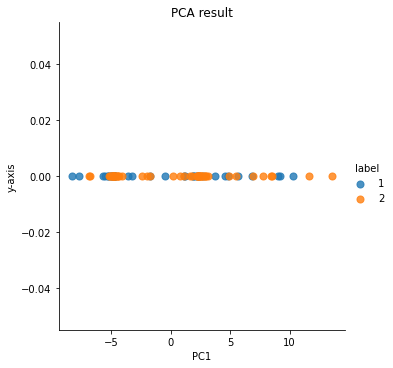

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False,  # x-axis, y-axis, data, no line
#           scatter_kws={"s": 50}, # marker size
#           hue="label") # color


sns.lmplot(x='PC1', y='y-axis', data=result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

# title
plt.title('PCA result')

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#'principal component 1', 'principal component 2','principal component 3', 'principal component 4','principal component 5', 'principal component 6','principal component 7', 'principal component 8','principal component 9', 'principal component 10','principal component 11', 'principal component 12','principal component 13'
finalDf = pd.concat([principalDf, dfa[['Class Attruibute']]], axis = 1)

finalDf

,principal component 1,principal component 2,Class Attruibute
0,10.274013,-6.314779,1
1,9.186736,-1.997814,1
2,6.865025,-0.285160,1
3,2.209527,-2.296534,1
4,1.203131,-3.518029,1
...,...,...,...
78,-4.797245,3.825440,2
79,-4.860540,3.903433,2
80,-5.192743,3.460106,2
81,-5.075019,3.105903,2


Text(0, 0.5, 'pc2')

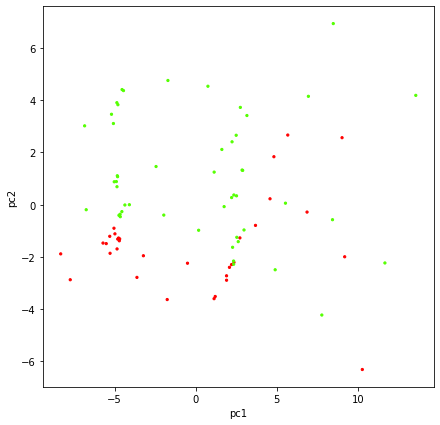

In [4]:
#finalDf = pd.concat([principalDf, dfa[['Class Attruibute']]], axis = 1)
#finalDf
plt.figure(figsize=(7,7))
plt.scatter(finalDf['principal component 1'],finalDf['principal component 2'],c=finalDf['Class Attruibute'],cmap='prism', s =5)
plt.xlabel('pc1')
plt.ylabel('pc2')

[25.62329656  6.23570579]
31.859002349655135
2


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (18,) and arg 1 with shape (2,).

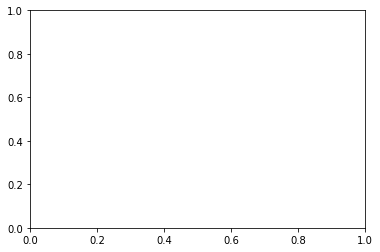

In [5]:
# calculate cumulative sum of explained variances
tot = sum(pca.explained_variance_)
print(pca.explained_variance_)
print(tot)

var_exp = [(i / tot) for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(len(var_exp))
# plot explained variances
plt.bar(range(1,19), var_exp, alpha=1.0,
        align='center', label='individual explained variance')
plt.step(range(1,19), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()


In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');